# Buisness Problem
You are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [1]:
################################## Data Analysis & Calculation ##################################

import pandas as pd 
import numpy as np 

################# Machine Learning ################
import statsmodels
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor

################# Data Visualization ################
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Data Import 

In [2]:
new=pd.read_csv(r"C:\Users\Chetan Habib\Desktop\Machine Learning\CarPrice.csv")
new

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Data Pre-Processing or EDA

In [3]:
new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
new=new.drop(['car_ID','CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem'],axis=1) #axix 1 means Column
new

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [9]:
new.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
new.tail()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0
204,-1,109.1,188.8,68.9,55.5,3062,141,3.78,3.15,9.5,114,5400,19,25,22625.0


In [11]:
new.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [12]:
new.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
new.columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [19]:
for i in new:
    if new[i].dtypes in ("float64","int64"):
        q1 = new[i].quantile(0.25)
        q3 = new[i].quantile(0.75)
        iqr = q3-q1
        ul = q3 + 1.5*iqr
        ll = q1 - 1.5*iqr
        new[i].clip(upper=ul,lower=ll,inplace=True)

<AxesSubplot:>

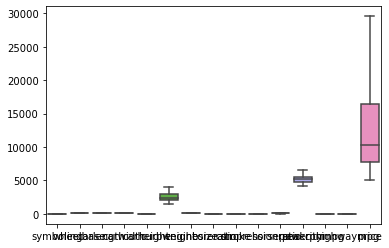

In [22]:
sns.boxplot(data=new)

In [23]:
new.isna().sum()

symboling           0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginesize          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Data Partition 

In [24]:
new.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [26]:
# Putting feature variable to X
X = new.drop('price', axis= 1)

# Putting response variable to y
y = new[['price']]

#random_state is the seed used by the random number generator. It can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, train_size=0.7 ,random_state=120)

In [28]:
new = pd.concat([y_train, X_train], axis=1)
new

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
171,11549.0,2,98.4,176.2,65.6,52.0,2714,146.0,3.62,3.50,9.30,116.0,4800.0,24.0,30.0
159,7788.0,0,95.7,166.3,64.4,52.8,2275,110.0,3.27,3.35,10.60,56.0,4500.0,38.0,47.0
175,9988.0,-1,102.4,175.6,66.5,53.9,2414,122.0,3.31,3.54,8.70,92.0,4200.0,27.0,32.0
132,11850.0,3,99.1,186.6,66.5,56.1,2658,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0
160,7738.0,0,95.7,166.3,64.4,53.0,2094,98.0,3.19,3.03,9.00,70.0,4800.0,38.0,47.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,16430.0,2,101.2,176.8,64.8,54.3,2395,108.0,3.50,2.80,8.80,101.0,5800.0,23.0,29.0
126,29575.5,3,89.5,168.9,65.0,51.6,2756,194.0,3.74,2.90,9.50,185.0,5900.0,17.0,25.0
158,7898.0,0,95.7,166.3,64.4,53.0,2275,110.0,3.27,3.35,10.60,56.0,4500.0,34.0,36.0
0,13495.0,3,88.6,168.8,64.1,48.8,2548,130.0,3.47,2.68,9.00,111.0,5000.0,21.0,27.0


# Correlation Matrix

In [29]:
np.round(new.corr(),2)

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
price,1.00,-0.06,0.53,0.67,0.76,0.14,0.85,0.85,0.57,0.03,0.04,0.84,0.02,-0.71,-0.71
symboling,-0.06,1.00,-0.58,-0.37,-0.27,-0.53,-0.24,-0.13,-0.18,-0.04,-0.06,0.07,0.35,-0.07,-0.01
wheelbase,0.53,-0.58,1.00,0.86,0.78,0.62,0.76,0.52,0.50,0.21,0.10,0.36,-0.36,-0.42,-0.49
carlength,0.67,-0.37,0.86,1.00,0.83,0.52,0.88,0.68,0.64,0.11,0.04,0.60,-0.27,-0.64,-0.67
carwidth,0.76,-0.27,0.78,0.83,1.00,0.29,0.89,0.72,0.58,0.18,0.09,0.64,-0.21,-0.60,-0.65
carheight,0.14,-0.53,0.62,0.52,0.29,1.00,0.32,0.15,0.21,0.02,0.10,-0.02,-0.32,-0.07,-0.12
curbweight,0.85,-0.24,0.76,0.88,0.89,0.32,1.00,0.87,0.66,0.17,0.02,0.78,-0.20,-0.74,-0.78
enginesize,0.85,-0.13,0.52,0.68,0.72,0.15,0.87,1.00,0.63,0.17,-0.01,0.82,-0.19,-0.64,-0.66
boreratio,0.57,-0.18,0.50,0.64,0.58,0.21,0.66,0.63,1.00,-0.11,0.02,0.58,-0.21,-0.55,-0.55
stroke,0.03,-0.04,0.21,0.11,0.18,0.02,0.17,0.17,-0.11,1.00,-0.05,0.05,-0.10,-0.01,-0.03


<AxesSubplot:>

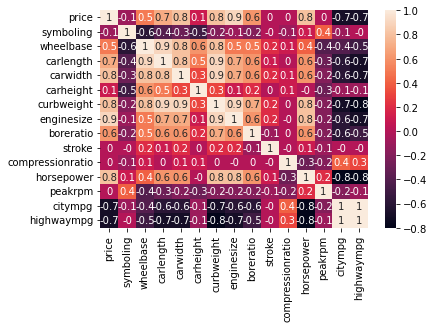

In [35]:
sns.heatmap(np.round(new.corr(),1),annot = True)

In [36]:
new.shape

(143, 15)

In [39]:
X1=new.drop(['price','carwidth'],axis=1)
series_before = pd.Series([variance_inflation_factor(X1.values, i) 
                           for i in range(X1.shape[1])],  # i=0,1,2
                          index=X1.columns)  # column name
series_before 

symboling              2.321623
wheelbase           2138.256479
carlength           1754.562103
carheight            882.290992
curbweight           465.089367
enginesize           113.377371
boreratio            316.849195
stroke               176.130936
compressionratio     267.982072
horsepower            98.519046
peakrpm              206.021563
citympg              412.002470
highwaympg           513.693306
dtype: float64

# Model Building
Hypothesis

H0 : - There is no relationship between the dependent & independent variable

Vs

H1 : -There is relationship between the dependent & independent variable

Alpha =5% ( 0.05 )



In [41]:
import statsmodels.formula.api as smf
model = smf.ols('price ~ +wheelbase+carlength+carheight+curbweight+enginesize+boreratio+stroke+compressionratio+horsepower+peakrpm+citympg+highwaympg',data=new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     62.20
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           7.44e-48
Time:                        22:34:09   Log-Likelihood:                -1327.4
No. Observations:                 143   AIC:                             2681.
Df Residuals:                     130   BIC:                             2719.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.799e+04   1.07e+04     -1.687      0.094   -3.91e+04    3104.200
wheelbase          179.5437    101.130      1.775      0.078     -20.530     379.617
carlength          -97.7688     56.012     -1.746      0.083    -208.581      13.044
carheight           30.0550    130.166      0.231      0.818    -227.463     287.573
curbweight           5.2614      1.956      2.689      0.008       1.391       9.132
enginesize          67.0629     18.900      3.548      0.001      29.672     104.453
boreratio        -2420.7235   1295.128     -1.869      0.064   -4982.979     141.532
stroke           -2843.8600    937.600     -3.033      0.003   -4698.789    -988.931
compressionratio  1334.8306    401.132      3.328      0.001     541.239    2128.422
horsepower          66.2966     21.196      3.128      0.002      24.362     108.231
peakrpm              1.0956      0.729      1.503      0.135      -0.346       2.538
citympg           -279.4475    182.639     -1.530      0.128    -640.777      81.882
highwaympg         214.0417    165.039      1.297      0.197    -112.468     540.551
==============================================================================
Omnibus:                       11.752   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.695
Skew:                          -0.406   Prob(JB):                     8.72e-05
Kurtosis:                       4.574   Cond. No.                     2.68e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.68e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Conclusion
We Reject Ho

There is relationship between the independent & dependent variable

Accuracy of Model is 85%, So Model is Good Fit

In [51]:
new['fitted_value']=model.fittedvalues #Predicted Value
new['residual']=model.resid  #Error
new.head()

,price,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,fitted_value,residual
171,11549.0,2,98.4,176.2,65.6,52.0,2714,146.0,3.62,3.50,9.30,116.0,4800.0,24.0,30.0,14448.935919,-2899.935919
159,7788.0,0,95.7,166.3,64.4,52.8,2275,110.0,3.27,3.35,10.60,56.0,4500.0,38.0,47.0,8661.172605,-873.172605
175,9988.0,-1,102.4,175.6,66.5,53.9,2414,122.0,3.31,3.54,8.70,92.0,4200.0,27.0,32.0,9271.953081,716.046919
132,11850.0,3,99.1,186.6,66.5,56.1,2658,121.0,3.54,3.07,9.31,110.0,5250.0,21.0,28.0,13645.223130,-1795.223130
160,7738.0,0,95.7,166.3,64.4,53.0,2094,98.0,3.19,3.03,9.00,70.0,4800.0,38.0,47.0,7134.925078,603.074922


# Assumption of model

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

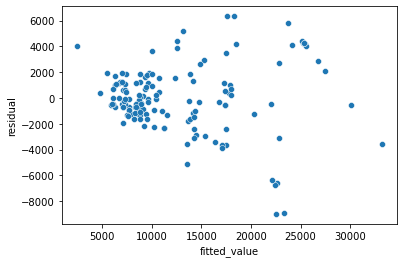

In [52]:
sns.scatterplot(x='fitted_value', y='residual',data=new)

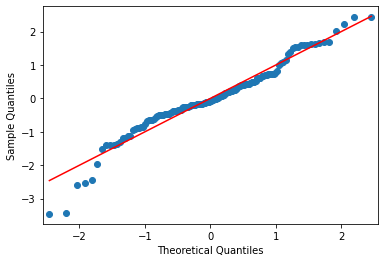

In [53]:
import statsmodels.api as sm
fig = sm.qqplot(new['residual'], fit=True, line='s') # s indicate standardized line
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


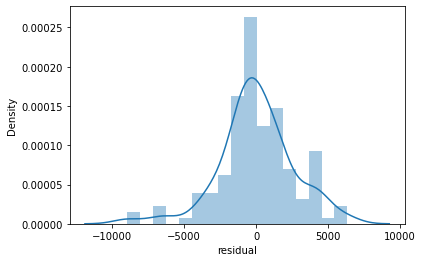

In [56]:
ax = sns.distplot(new.residual) 

# Test Data

In [57]:
df_test=pd.concat([X_test,y_test],axis=1)

df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
125,3,94.5,168.9,68.3,50.2,2778,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0,22018.0
64,0,98.8,177.8,66.5,55.5,2425,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,11245.0
114,0,114.2,198.9,68.4,58.7,3485,152.0,3.70,3.52,10.6,95.0,4150.0,25.0,25.0,17075.0
203,-1,109.1,188.8,68.9,55.5,3217,145.0,3.01,3.40,10.6,106.0,4800.0,26.0,27.0,22470.0
35,0,96.5,163.4,64.0,54.5,2010,92.0,2.91,3.41,9.2,76.0,6000.0,30.0,34.0,7295.0


In [58]:
df_test['Prediction']=model.predict(df_test) # predict = all row prediction ( Auto )
df_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Prediction
125,3,94.5,168.9,68.3,50.2,2778,151.0,3.94,3.11,9.5,143.0,5500.0,19.0,27.0,22018.0,18993.885152
64,0,98.8,177.8,66.5,55.5,2425,122.0,3.39,3.39,8.6,84.0,4800.0,26.0,32.0,11245.0,9022.369697
114,0,114.2,198.9,68.4,58.7,3485,152.0,3.70,3.52,10.6,95.0,4150.0,25.0,25.0,17075.0,17757.352453
203,-1,109.1,188.8,68.9,55.5,3217,145.0,3.01,3.40,10.6,106.0,4800.0,26.0,27.0,22470.0,19455.103341
35,0,96.5,163.4,64.0,54.5,2010,92.0,2.91,3.41,9.2,76.0,6000.0,30.0,34.0,7295.0,7792.532136


In [62]:
from sklearn.metrics import r2_score
r2 = r2_score(df_test.price, df_test.Prediction)
print('R2 score for model Performance on Test', np.round(r2,2))

R2 score for model Performance on Test 0.84
